# Kernels, Soft Margin & Regularization (SVM)

## 1. What is a Kernel?

Kernels allow SVMs to solve **non-linear problems** by mapping input data to a **higher-dimensional space**.

### Common Kernels:
- **Linear**
- **Polynomial**
- **RBF (Radial Basis Function)**

---

## 2. Soft Margin

Real-world data isn’t always perfectly separable.

A **soft margin** allows some misclassifications, balancing:
- **Low training error**
- **Generalization to new data**

Controlled by the `C` parameter:
- **Large C**: Less tolerance for misclassification
- **Small C**: More flexible decision boundary

---

## 3. Code Example: Using Kernels and C

```python
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Use only 2 classes for binary SVM
X = X[y != 2]
y = y[y != 2]

# Scale and reduce dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train SVM with RBF kernel and soft margin
clf = SVC(kernel='rbf', C=1.0)
clf.fit(X_reduced, y)


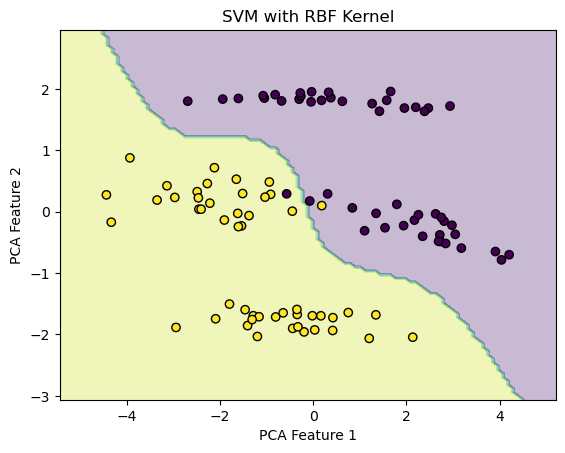

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# Create a toy dataset (for demonstration purposes)
X, y = make_classification(n_samples=100, n_features=5, n_classes=2, random_state=42)

# Reduce dimensions with PCA to 2 features for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Create and fit the SVM model with RBF kernel
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X_reduced, y)

# Create mesh grid for decision boundary visualization
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict over the mesh grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o')
plt.title("SVM with RBF Kernel")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()
